- Name: Carla Harrell
- Course: DSC540
- Assignment: Final 
- Date: 02-29-2020

The following is due submitted to the assignment link or submit a link to your GitHub repository to the
assignment link:

 Your formatted dataset with at least 15-20 variables (if the API or Webpage you selected doesn’t
have that many fields available on it, you will want to search again, or do multiple!)
 Your code or screenshots of your code outlining the steps and process you had to take to pull
data from the API or web page and the steps you took to format the data.
 2 Data Transformation/Clean-up Steps (can be any that we learned in class)
 A 250-word paper summarizing your steps and any challenges you ran into during the project.

Discuss the importance and relevance of this type of process if you were a data scientist. How
often do you think you would have to do this to get the data you need?

Before starting you should have two things done:

1.Spotify API permissions & credentials that could apply in the next block of code. Simply log in, go to your “dashboard” and select “create client id”.

2.Python module — spotipy — imported (you can download it using - "pip install spotipy")


The API will extract data of Coldplay Artist from Spotify to include 15 variables pertaining to various songs and albums by this artist.

In [21]:
# This line keeps the code neat
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
import spotipy
import matplotlib.pyplot as plt

from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = ''#Enter client_id
client_secret = ''#Enter client_secret
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "{'Cold Play}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp'},
  'href': 'https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp',
  'id': '69GGBxA162lTqCwzJG5jLp',
  'name': 'The Chainsmokers',
  'type': 'artist',
  'uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
  'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
  'id': '4gzpq5DPGxSnKTe4SA8HAU',
  'name': 'Coldplay',
  'type': 'artist',
  'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}]

In [23]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['World War Joy (Japan Edition)',
 'World War Joy',
 'Sick Boy (Special Edition)',
 'Sick Boy',
 'Memories...Do Not Open',
 'The Chainsmokers- Japan Special Edition']

['spotify:album:3cbcpRK1paF6lAxd16cmIE',
 'spotify:album:01GR4NL5O5CZM51k0aejKD',
 'spotify:album:1AVNEke0ElkA1cekT0a1vO',
 'spotify:album:6ZvDJs17O3woQirttKRYCG',
 'spotify:album:4JPguzRps3kuWDD5GS6oXr',
 'spotify:album:3ShQFl9FladFKlonwPGZFc']

In [24]:
#Preparing variables to add to the dictionary
def albumSongs(uri):
    album = uri #assign album uri to a_name
    
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [25]:
#Adding to the dictionary
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album World War Joy (Japan Edition) songs has been added to spotify_albums dictionary
Album World War Joy songs has been added to spotify_albums dictionary
Album Sick Boy (Special Edition) songs has been added to spotify_albums dictionary
Album Sick Boy songs has been added to spotify_albums dictionary
Album Memories...Do Not Open songs has been added to spotify_albums dictionary
Album The Chainsmokers- Japan Special Edition songs has been added to spotify_albums dictionary


In [26]:
#Adding features for the audio
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [27]:
#The rate import time without going over the limits
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 14.099729061126709 seconds


In [28]:
# Creating dictionary of variables.
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

77

In [29]:
#creating a dataframe
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,World War Joy (Japan Edition),1,1z12ytybd2liMXldGrit6d,The Reaper (feat. Amy Shark),spotify:track:1z12ytybd2liMXldGrit6d,0.13500,0.633,0.564,0.0,0.2010,-7.789,0.0701,164.008,0.648,23
1,World War Joy (Japan Edition),2,2S303RNiDWIZhWGTz5iIXO,Family,spotify:track:2S303RNiDWIZhWGTz5iIXO,0.42600,0.584,0.607,0.0,0.1010,-6.605,0.0356,117.817,0.374,22
2,World War Joy (Japan Edition),3,7M2BekPoY7o3XpEZGdHVA1,See The Way (feat. Sabrina Claudio),spotify:track:7M2BekPoY7o3XpEZGdHVA1,0.12900,0.558,0.456,0.0,0.1890,-8.118,0.0945,94.851,0.566,22
3,World War Joy (Japan Edition),4,0fOiTY8wUM6u4GLGOFKvZs,P.S. I Hope You're Happy (feat. blink-182),spotify:track:0fOiTY8wUM6u4GLGOFKvZs,0.00883,0.583,0.802,0.0,0.0615,-4.312,0.0367,100.054,0.649,22
4,World War Joy (Japan Edition),5,6WrqN1bl4w1IS6keDQ9ipg,Push My Luck,spotify:track:6WrqN1bl4w1IS6keDQ9ipg,0.29300,0.563,0.645,0.0,0.2020,-6.422,0.0428,89.976,0.523,21


###  Transformations

In [30]:
## removing the duplicates and cleaning the dataframe


In [31]:
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

77
66


In [32]:
#looking at the data
final_df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,World War Joy (Japan Edition),1,1z12ytybd2liMXldGrit6d,The Reaper (feat. Amy Shark),spotify:track:1z12ytybd2liMXldGrit6d,0.13500,0.633,0.564,0.0,0.2010,-7.789,0.0701,164.008,0.648,23
2,World War Joy (Japan Edition),3,7M2BekPoY7o3XpEZGdHVA1,See The Way (feat. Sabrina Claudio),spotify:track:7M2BekPoY7o3XpEZGdHVA1,0.12900,0.558,0.456,0.0,0.1890,-8.118,0.0945,94.851,0.566,22
3,World War Joy (Japan Edition),4,0fOiTY8wUM6u4GLGOFKvZs,P.S. I Hope You're Happy (feat. blink-182),spotify:track:0fOiTY8wUM6u4GLGOFKvZs,0.00883,0.583,0.802,0.0,0.0615,-4.312,0.0367,100.054,0.649,22
5,World War Joy (Japan Edition),6,20OHzqdcaEj1678EyTT6qm,Takeaway (feat. Lennon Stella),spotify:track:20OHzqdcaEj1678EyTT6qm,0.12600,0.528,0.511,0.0,0.1010,-8.144,0.0324,100.100,0.351,21
6,World War Joy (Japan Edition),7,5mLCE4b2u3JRMhTKeFUUtu,Call You Mine (feat. Bebe Rexha),spotify:track:5mLCE4b2u3JRMhTKeFUUtu,0.20400,0.585,0.696,0.0,0.3440,-5.600,0.0307,104.010,0.522,21


In [33]:
## calculating the descriptive statistics of each quantitative column in the given dataframe

In [34]:
final_df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,8.181818,0.114524,0.591212,0.692697,0.001096,0.201279,-6.300333,0.058373,117.937591,0.397552,42.484848
std,5.745658,0.128172,0.102280,0.150797,0.004754,0.122811,1.935785,0.043704,26.667843,0.162653,25.427570
min,1.000000,0.000443,0.320000,0.303000,0.000000,0.061500,-11.362000,0.025900,75.168000,0.063700,10.000000
25%,4.000000,0.014575,0.546000,0.571000,0.000000,0.103250,-7.742250,0.036700,99.992500,0.272250,19.000000
50%,7.000000,0.060000,0.592000,0.697500,0.000000,0.156000,-6.236000,0.043800,104.975500,0.397000,44.500000
75%,11.750000,0.155250,0.660500,0.829250,0.000014,0.287750,-4.838750,0.063300,136.959250,0.531750,65.000000
max,23.000000,0.488000,0.783000,0.941000,0.035800,0.544000,-2.588000,0.312000,203.443000,0.649000,84.000000


In [35]:
## checking and counting null values in dataframe


final_df.isnull().sum()

album               0
track_number        0
id                  0
name                0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

There are no null values in the dataframe created from Spotify through API

In [36]:
## Bar plot of different tracks name and their popularity

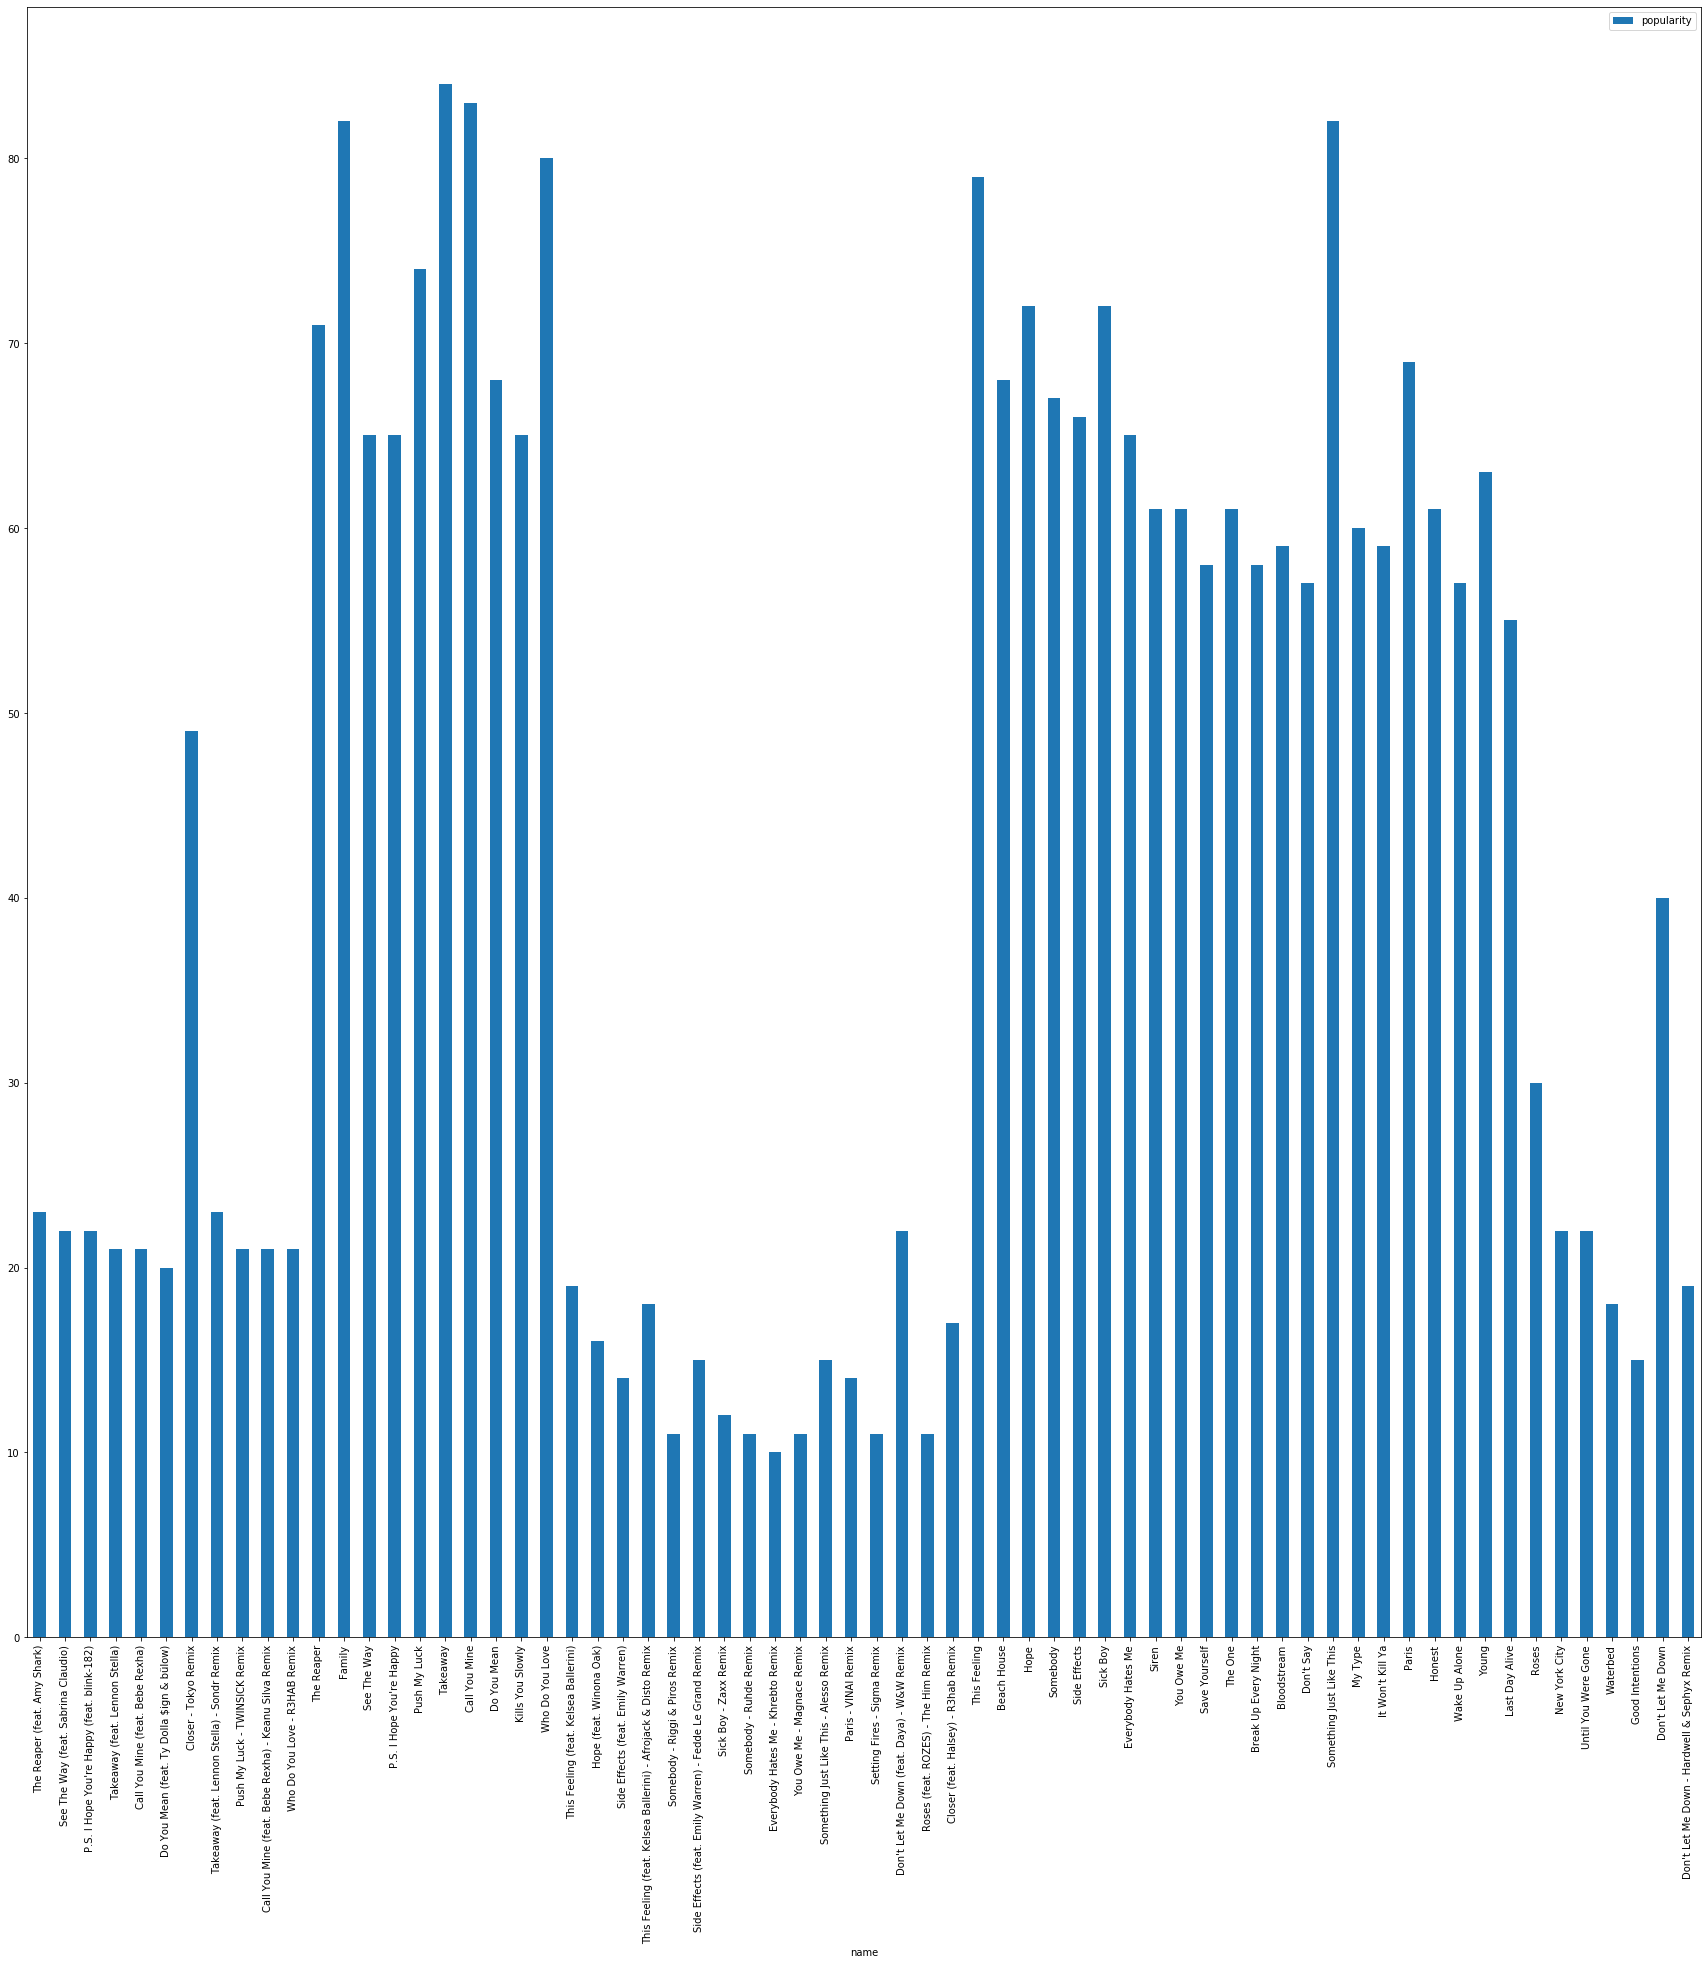

In [37]:
final_df.plot.bar(x='name', y='popularity', rot=90,figsize=(30,30))


In [38]:
#Demonstrating the 15 variables
df.shape

(77, 15)